# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import Imputer

# Loading the dataset  

In [2]:
d=pd.read_csv('vehicle.csv')

In [3]:
d.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

# Shape of the data

In [22]:
print("The data has {} entries with {} features and 1 Target column".format(d.shape[0],d.shape[1]-1))

The data has 846 entries with 18 features and 1 Target column


# Data type of each attribute 

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Except class column all other features are of numerical types which ensure there is no unwanted symbols in the dataset

# Handling missing values

In [6]:
print("The total number of missing values in each column the dataset")
d.isnull().sum()

The total number of missing values in each column the dataset


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Seems data has some missing values lets replace it with median values (as outliers are present,see below)

In [7]:
k=Imputer(strategy='median')
k=k.fit(d.iloc[:,:-1])
dip=k.transform(d.iloc[:,:-1].values)
d.iloc[:,:-1]=dip

E:\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# 5 point summary

In [8]:
d.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

<Figure size 432x288 with 0 Axes>

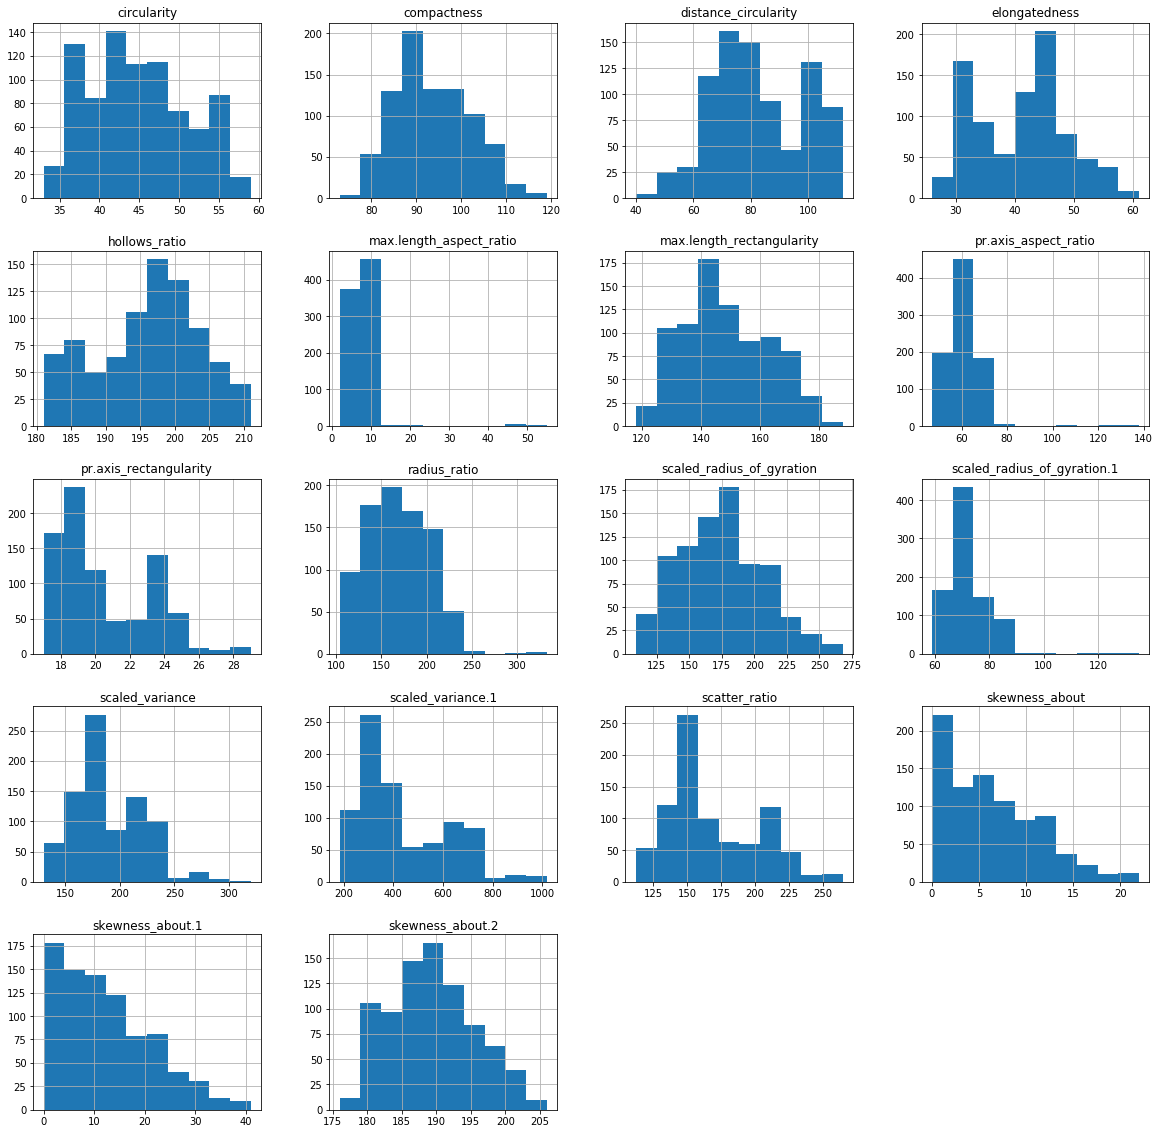

In [9]:
plt.figure()
d.hist(figsize=(20,20))
plt.show()

From the plot we can see that the circularity, compactness, scaled_radius_gyration, max_length_rectangularity, skewness_about 2,elongatedness has almost normal distribution

scaled_variance1,Skewness_about_1,skewness_about,pr.axis_rectangularity has right skew

max.length_aspect_ratio,pr.axis_aspect_ratio,radius_ratio,scaled_radius_of_gyration_1 has outliers as there are some gaps in the bar plot

# Handling outliers

It will be easier to plot and analyzie if the datas are of same scale. lets apply zscore standardization

In [10]:
df_scaled=d.iloc[:,:-1].apply(zscore)

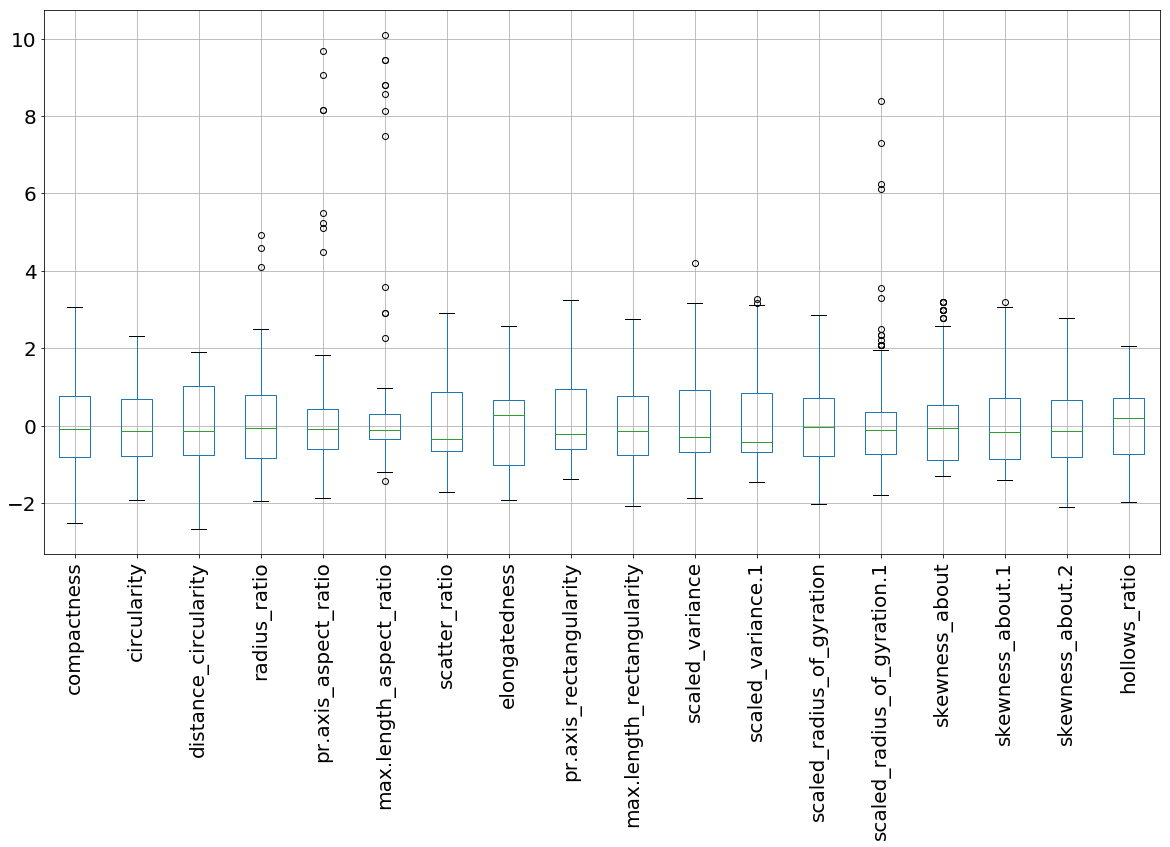

In [11]:
df_scaled.boxplot(figsize=(20,10),rot=90,fontsize=20)


It seems there are outliers in 
columns radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio,scaled_variance,scaled_variance.1, scaled_radius_of_gyration.1, skewness_about,skewness_about.1

There are different ways to handle it, 

1)drop the outliers

2)take log or squareroot or cube root

based on trials I identified that taking square root and then droping the remaining outliers proved efficient as it drops less number of data this way

In [12]:
dff=d.iloc[:,:-1].apply(np.sqrt)
dff_scaled=dff.apply(zscore)

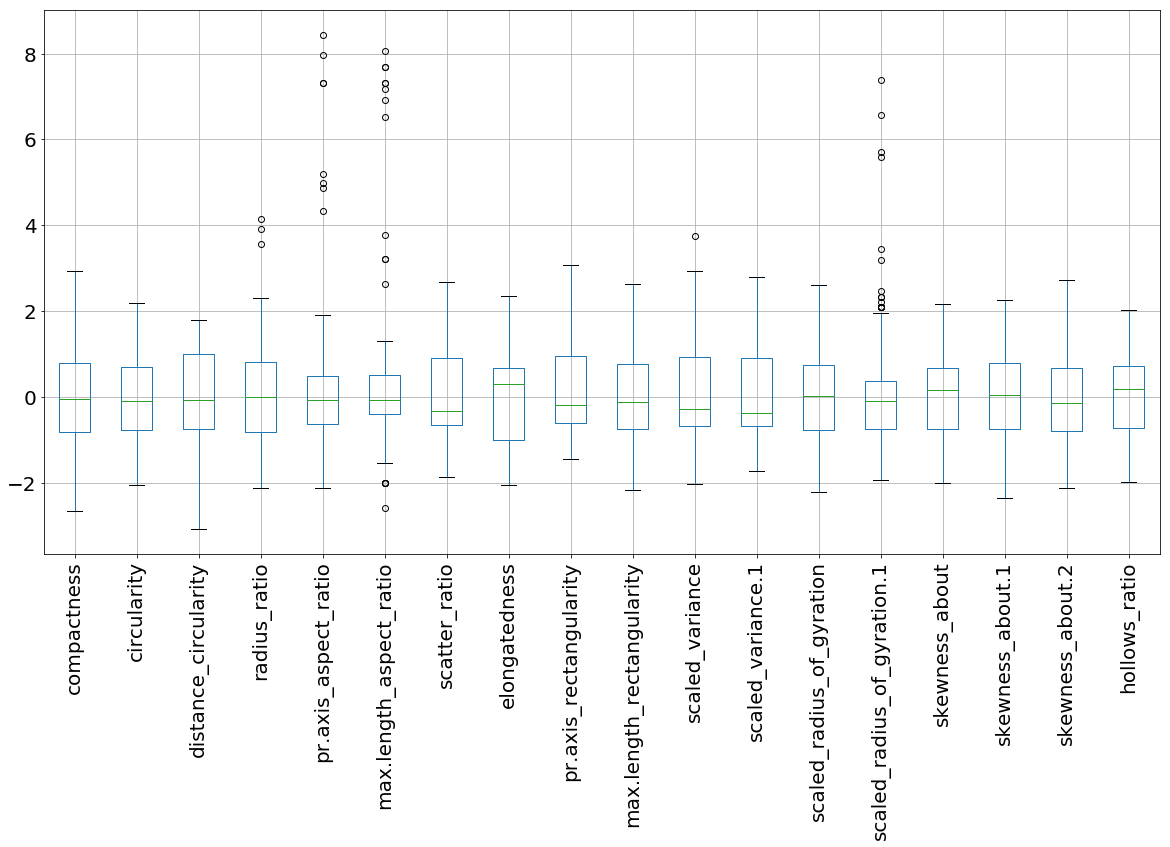

In [13]:
dff_scaled.boxplot(figsize=(20,10),rot=90,fontsize=20)


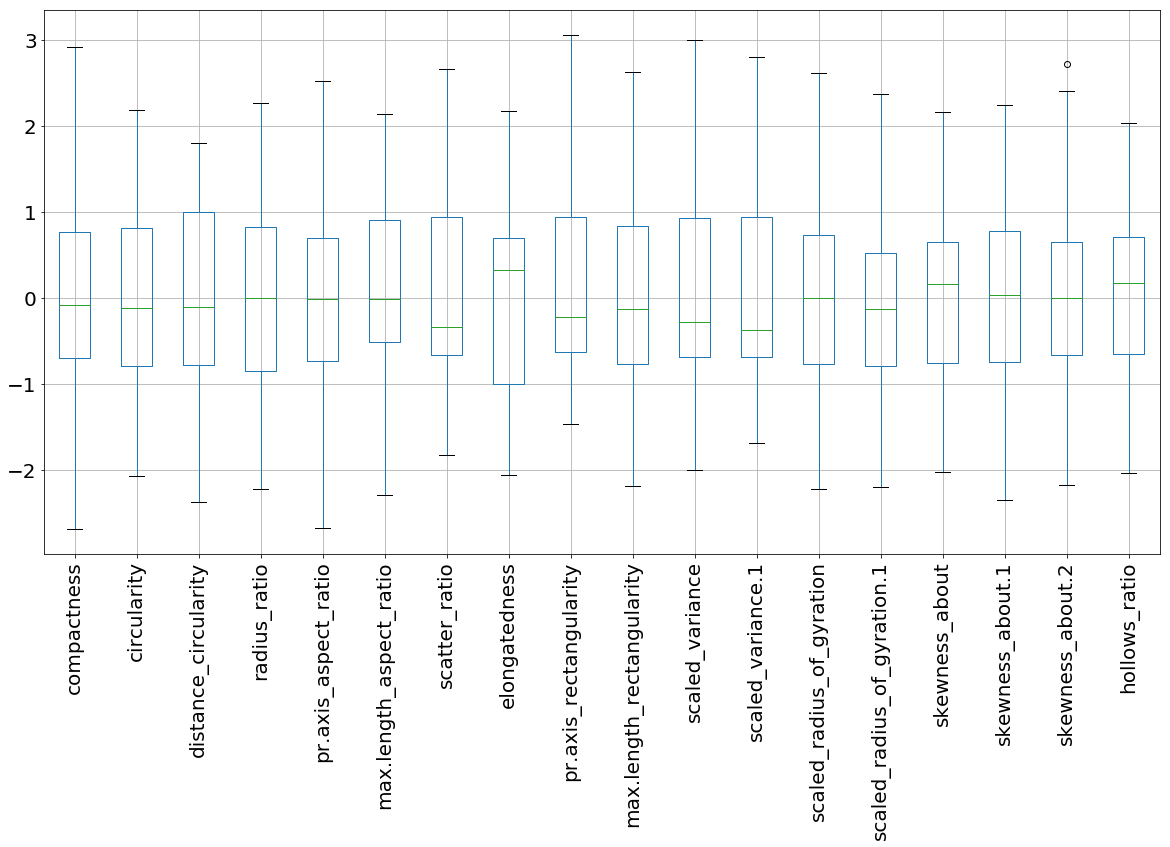

In [14]:
Q1=dff.quantile(0.25)
Q3=dff.quantile(0.75)
IQR=Q3-Q1
dff['class']=d['class']
dff_=dff[~((dff<(Q1-1.5*IQR))|(dff>(Q3+1.5*IQR))).any(axis=1)]
dff_scaled=dff_.iloc[:,:-1].apply(zscore)
dff_scaled.boxplot(figsize=(20,10),rot=90,fontsize=20)

It looks a lot better, there is one outlier in skewness_about.2 its is due to the fact that when data are dropped the quartile value changes as result some new outliers may come, lets ignore it

In [15]:
dff_.shape

(826, 19)

seems 13 datas were lost in this drop

# Balance in data set

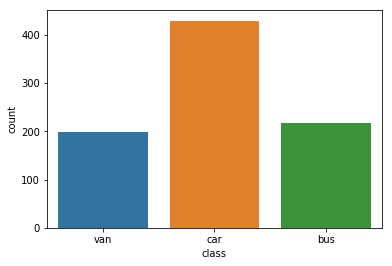

In [16]:
sns.countplot('class',data=d)

Dataset seems unbalanced with car having high number. lets ignore it for now. if the results are undesired lets try upsampling

# Find relationship between different attributes 

In [17]:
dff_.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.674440              0.781548   
circularity                     0.674440     1.000000              0.781267   
distance_circularity            0.781548     0.781267              1.000000   
radius_ratio                    0.746975     0.633548              0.813864   
pr.axis_aspect_ratio            0.195886     0.199487              0.251578   
max.length_aspect_ratio         0.486088     0.541845              0.655622   
scatter_ratio                   0.804148     0.840643              0.905710   
elongatedness                  -0.797708    -0.822118             -0.909920   
pr.axis_rectangularity          0.808493     0.837983              0.892419   
max.length_rectangularity       0.672548     0.962093              0.764990   
scaled_variance                 0.786084     0.803116              0.887665   
scaled_variance.1               0.808267     0.833442              0.898518   
scaled_radius_of_gyration       0.569202     0.929793              0.693651   
scaled_radius_of_gyration.1    -0.249715     0.086937             -0.227920   
skewness_about                  0.191672     0.135223              0.077528   
skewness_about.1                0.145007    -0.021515              0.239643   
skewness_about.2                0.300109    -0.117315              0.142209   
hollows_ratio                   0.367188     0.035086              0.329179   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.746975              0.195886   
circularity                      0.633548              0.199487   
distance_circularity             0.813864              0.251578   
radius_ratio                     1.000000              0.663859   
pr.axis_aspect_ratio             0.663859              1.000000   
max.length_aspect_ratio          0.459085              0.151890   
scatter_ratio                    0.794214              0.203033   
elongatedness                   -0.839954             -0.277404   
pr.axis_rectangularity           0.764423              0.165983   
max.length_rectangularity        0.574531              0.142486   
scaled_variance                  0.798337              0.215654   
scaled_variance.1                0.796210              0.206214   
scaled_radius_of_gyration        0.540626              0.146111   
scaled_radius_of_gyration.1     -0.407199             -0.326940   
skewness_about                   0.041018             -0.039361   
skewness_about.1                 0.164038             -0.031826   
skewness_about.2                 0.436468              0.410263   
hollows_ratio                    0.521548              0.430508   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.486088       0.804148   
circularity                                 0.541845       0.840643   
distance_circularity                        0.655622       0.905710   
radius_ratio                                0.459085       0.794214   
pr.axis_aspect_ratio                        0.151890       0.203033   
max.length_aspect_ratio                     1.000000       0.484079   
scatter_ratio                               0.484079       1.000000   
elongatedness                              -0.477684      -0.987445   
pr.axis_rectangularity                      0.479583       0.988024   
max.length_rectangularity                   0.624329       0.804973   
scaled_variance                             0.405220       0.978570   
scaled_variance.1                           0.458420       0.995035   
scaled_radius_of_gyration                   0.389307       0.787765   
scaled_radius_of_gyration.1                -0.339621       0.012723   
skewness_about                              0.067636       0.053172   
skewness_about.1                            0.133873       0.196028   
skewness_about.2                            0.

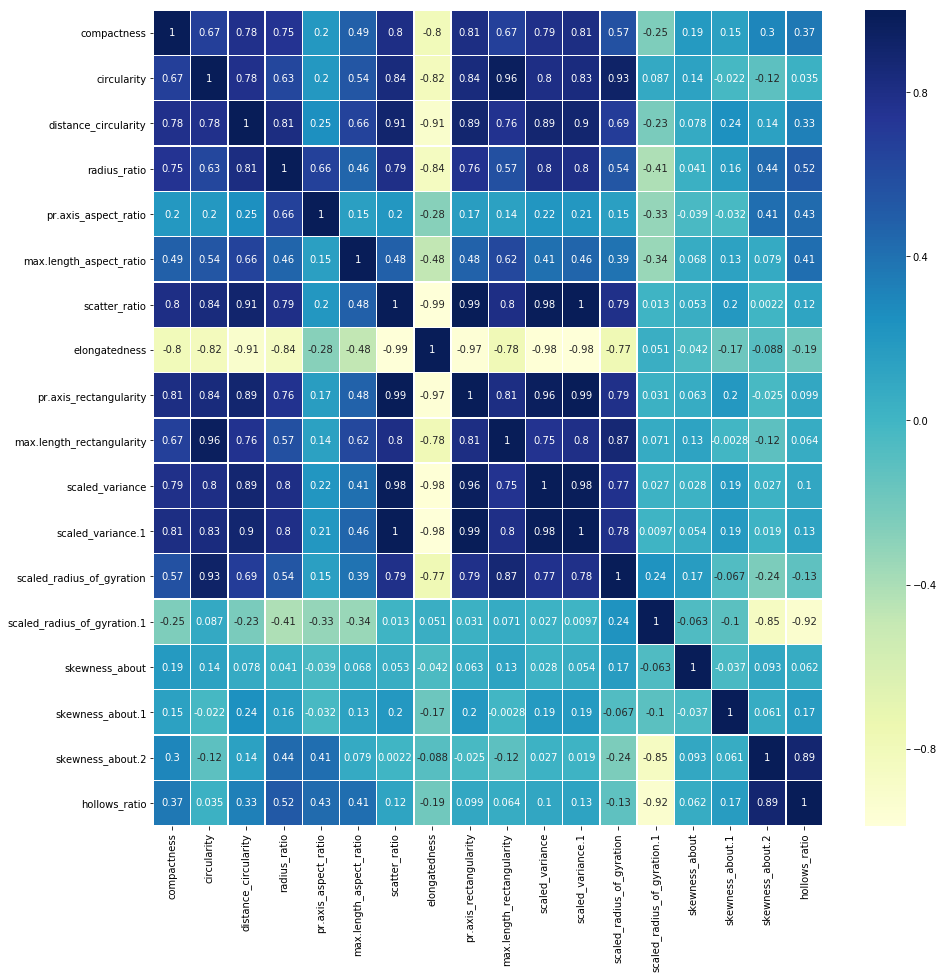

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(dff_.corr(),annot=True,center=0,cmap="YlGnBu",linewidths=.5)


# Lets analyze the upper diagonal matrix 

In [19]:
dcor=dff_.corr()
dropp=[]
for i in range(dcor.shape[0]):
    print('\n {} is highly correlated with the folllowing columns with high correlation coefficent of +/- 0.85'.format(dcor.columns[i]))
    nm=0
    for j in range(i,dcor.shape[0]):
        if abs(dcor.iloc[i,j])>=0.85 and i!=j:
            nm+=1
            print("      {}.{} ".format(nm,dcor.columns[j]))
            if dcor.columns[j] not in dropp:
                dropp.append(dcor.columns[j])
    if nm==0:
        print("      0.None in this diagonal matrix")


 compactness is highly correlated with the folllowing columns with high correlation coefficent of +/- 0.85
      0.None in this diagonal matrix

 circularity is highly correlated with the folllowing columns with high correlation coefficent of +/- 0.85
      1.max.length_rectangularity 
      2.scaled_radius_of_gyration 

 distance_circularity is highly correlated with the folllowing columns with high correlation coefficent of +/- 0.85
      1.scatter_ratio 
      2.elongatedness 
      3.pr.axis_rectangularity 
      4.scaled_variance 
      5.scaled_variance.1 

 radius_ratio is highly correlated with the folllowing columns with high correlation coefficent of +/- 0.85
      0.None in this diagonal matrix

 pr.axis_aspect_ratio is highly correlated with the folllowing columns with high correlation coefficent of +/- 0.85
      0.None in this diagonal matrix

 max.length_aspect_ratio is highly correlated with the folllowing columns with high correlation coefficent of +/- 0.85
      0.No

# Columns that can be dropped

In [20]:
print('Based on the above correlation analysis we can drop the following columns')
print(dropp)

Based on the above correlation analysis we can drop the following columns
['max.length_rectangularity', 'scaled_radius_of_gyration', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'hollows_ratio']


# Lets visualize the same with pair plots

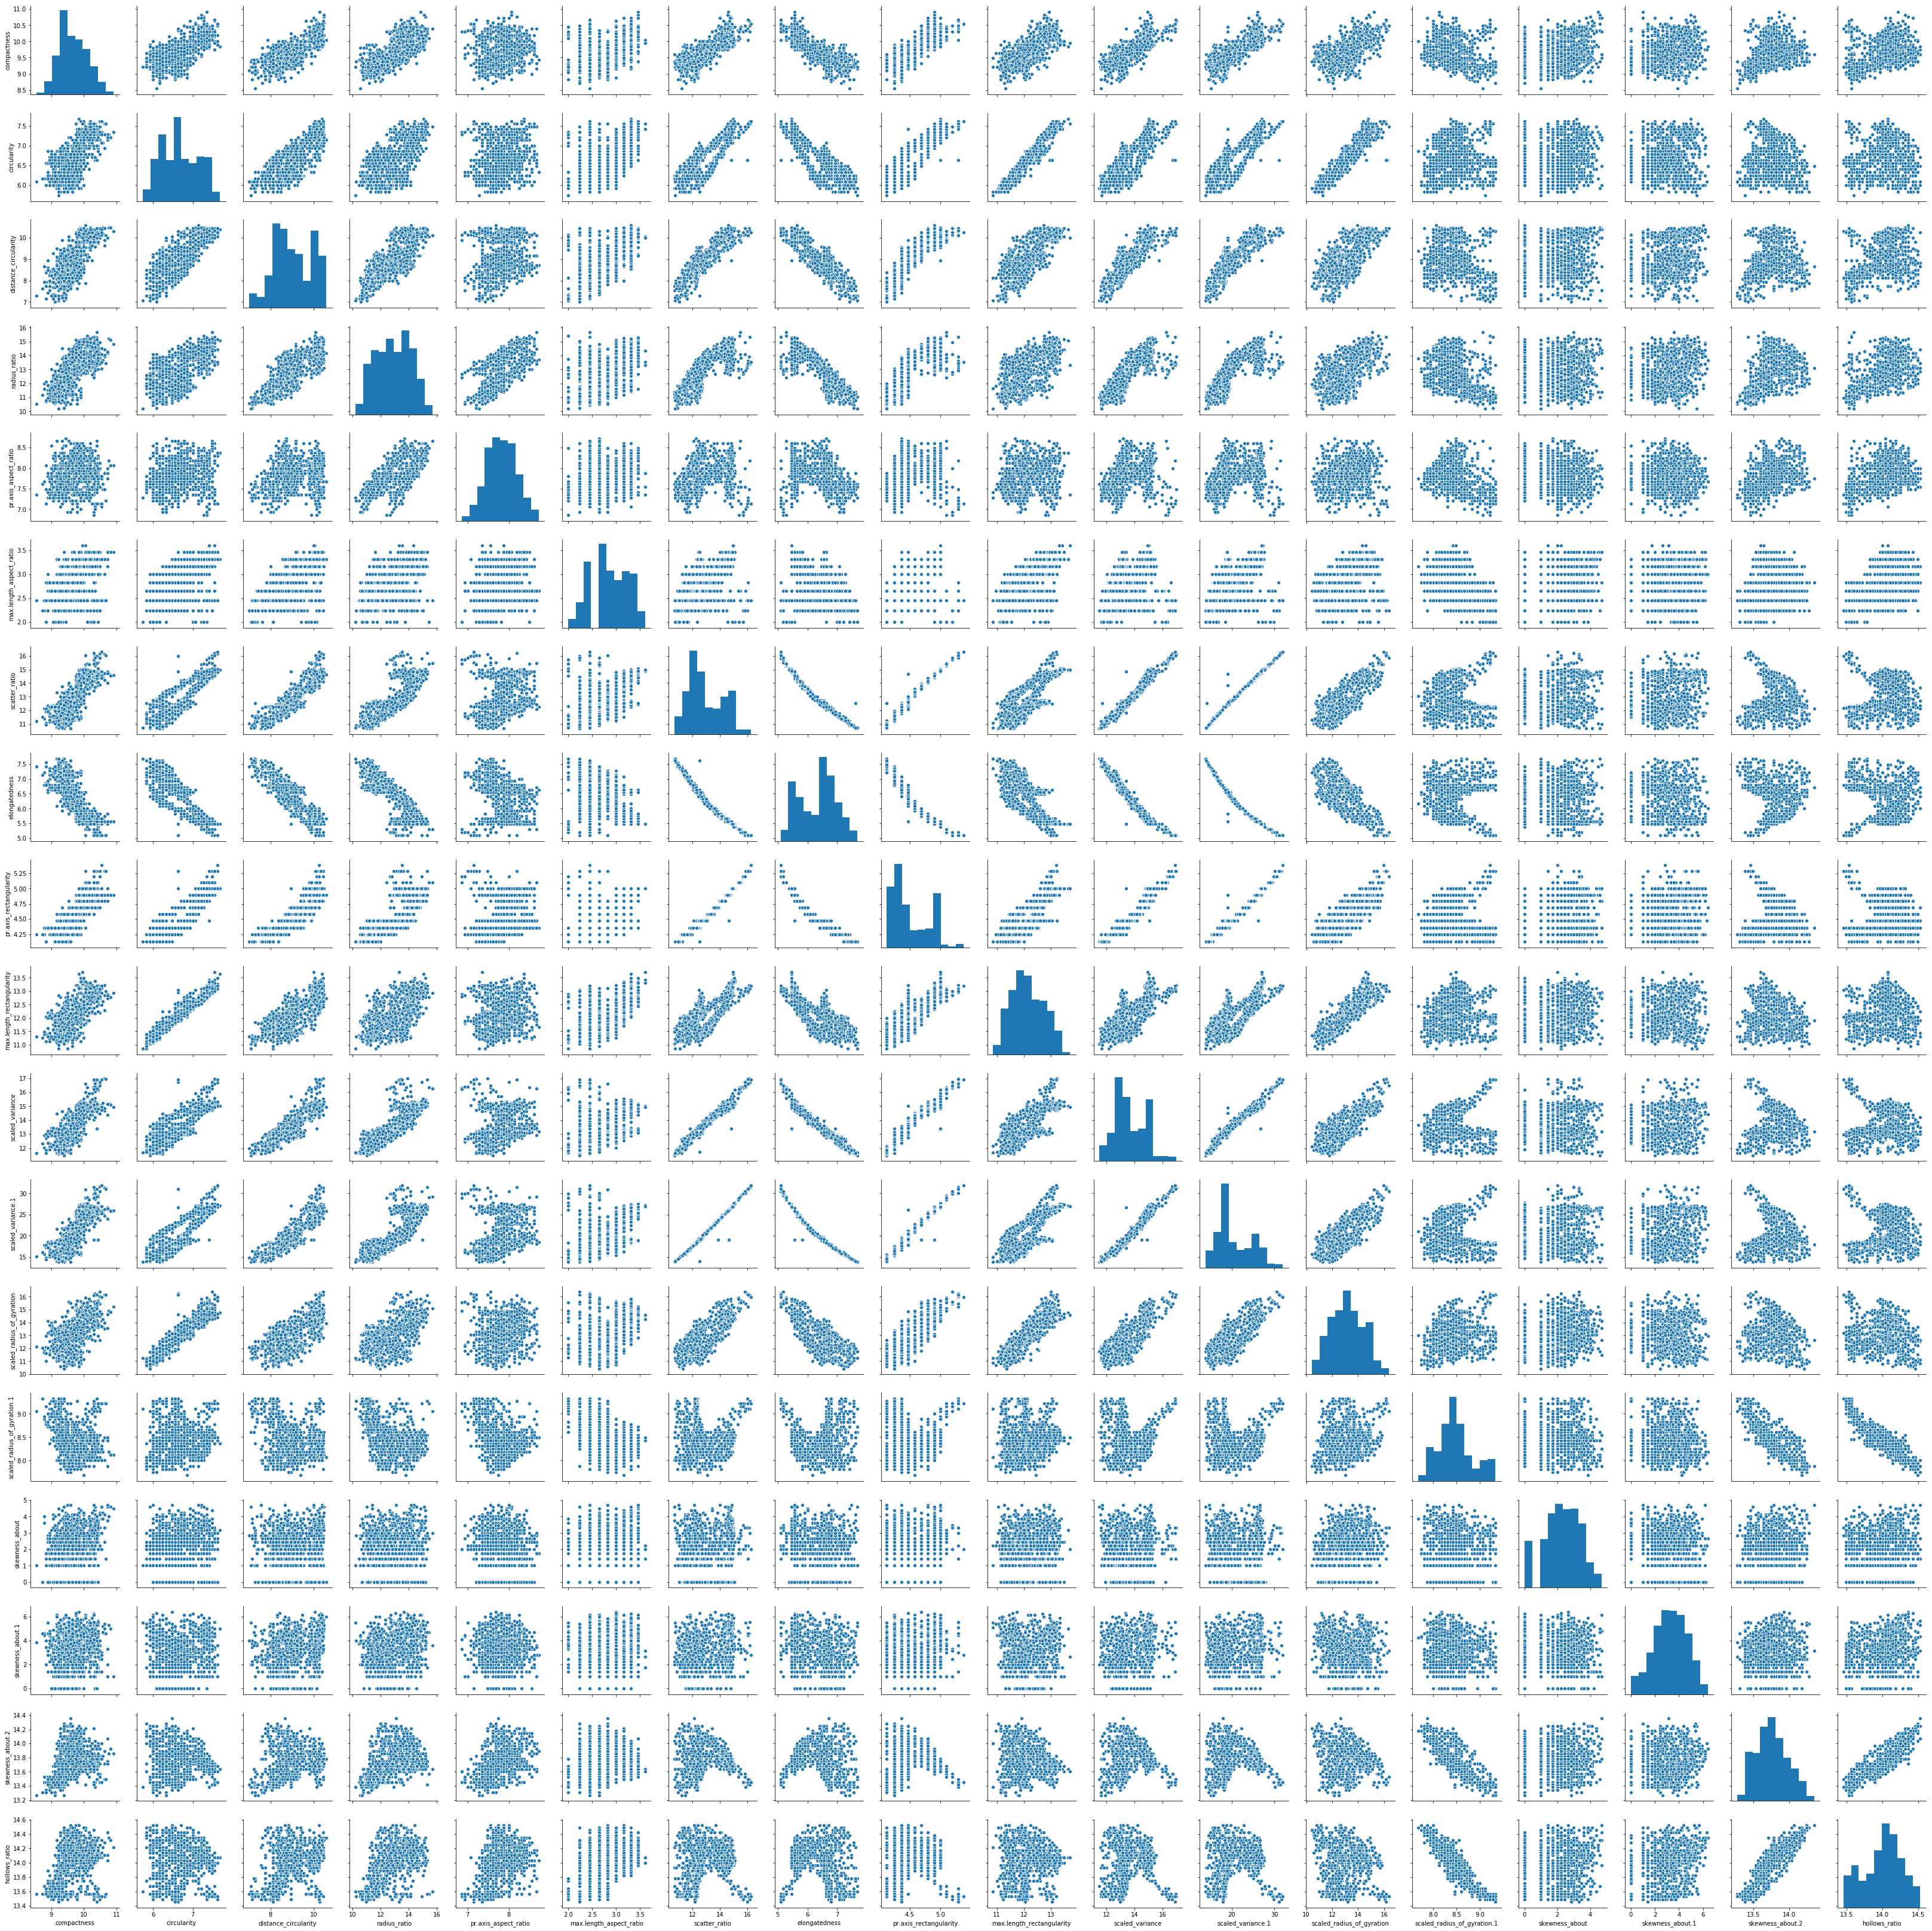

In [21]:
sns.pairplot(dff_)

# Principan Component analysis

Text(0, 0.5, 'variance explained')

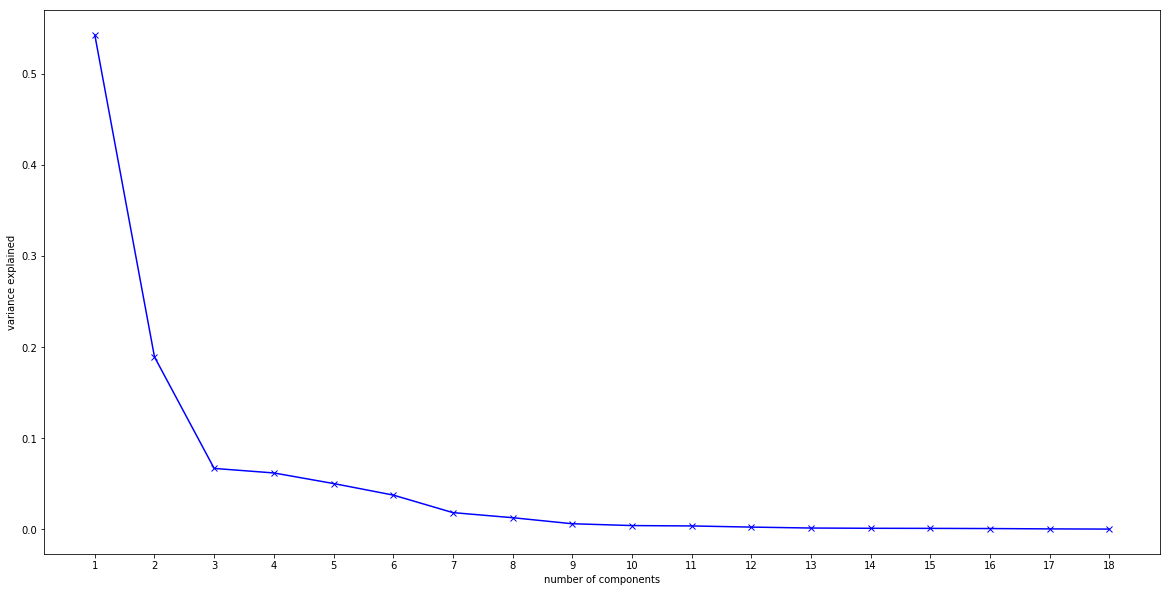

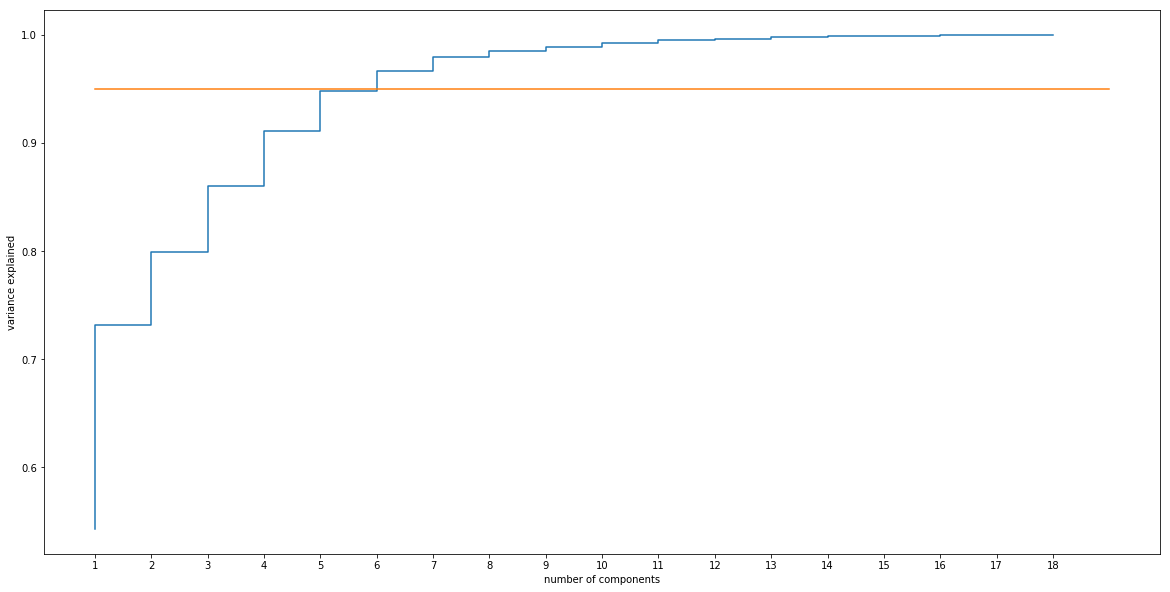

In [23]:
pca=PCA(n_components=18)
pca.fit(dff_scaled)
pca.explained_variance_
dff16=pd.DataFrame(pca.transform(dff_scaled))
plt.figure(figsize=(20,10))
plt.plot(list(range(1,19)),pca.explained_variance_ratio_,'bx-')
plt.xlabel('number of components')
plt.xticks(ticks=list(range(1,19)))
plt.ylabel('variance explained')
plt.figure(figsize=(20,10))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_))
plt.plot(list([1,19]),list([0.95,0.95]))
plt.xlabel('number of components')
plt.xticks(ticks=list(range(1,19)))
plt.ylabel('variance explained')


Based on the above plots it looks like more than 95% of variance is captured by having 7 number of components
Thus it might be enough to have 7 components for training the model and elbow occurs at 7

In [24]:
np.sum(pca.explained_variance_ratio_)

1.0000000000000002

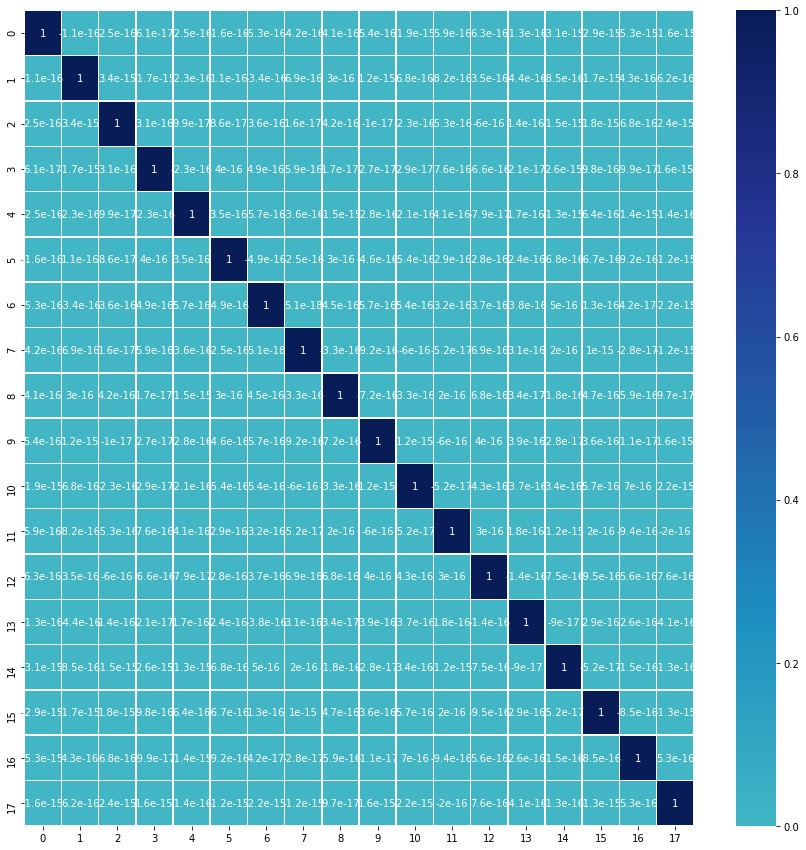

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(dff16.corr(),annot=True,center=0,cmap="YlGnBu",linewidths=.5)

The correlation matrix above shows that the PCA transformed data has no correlation between them, Lets also visualize this in pairplot

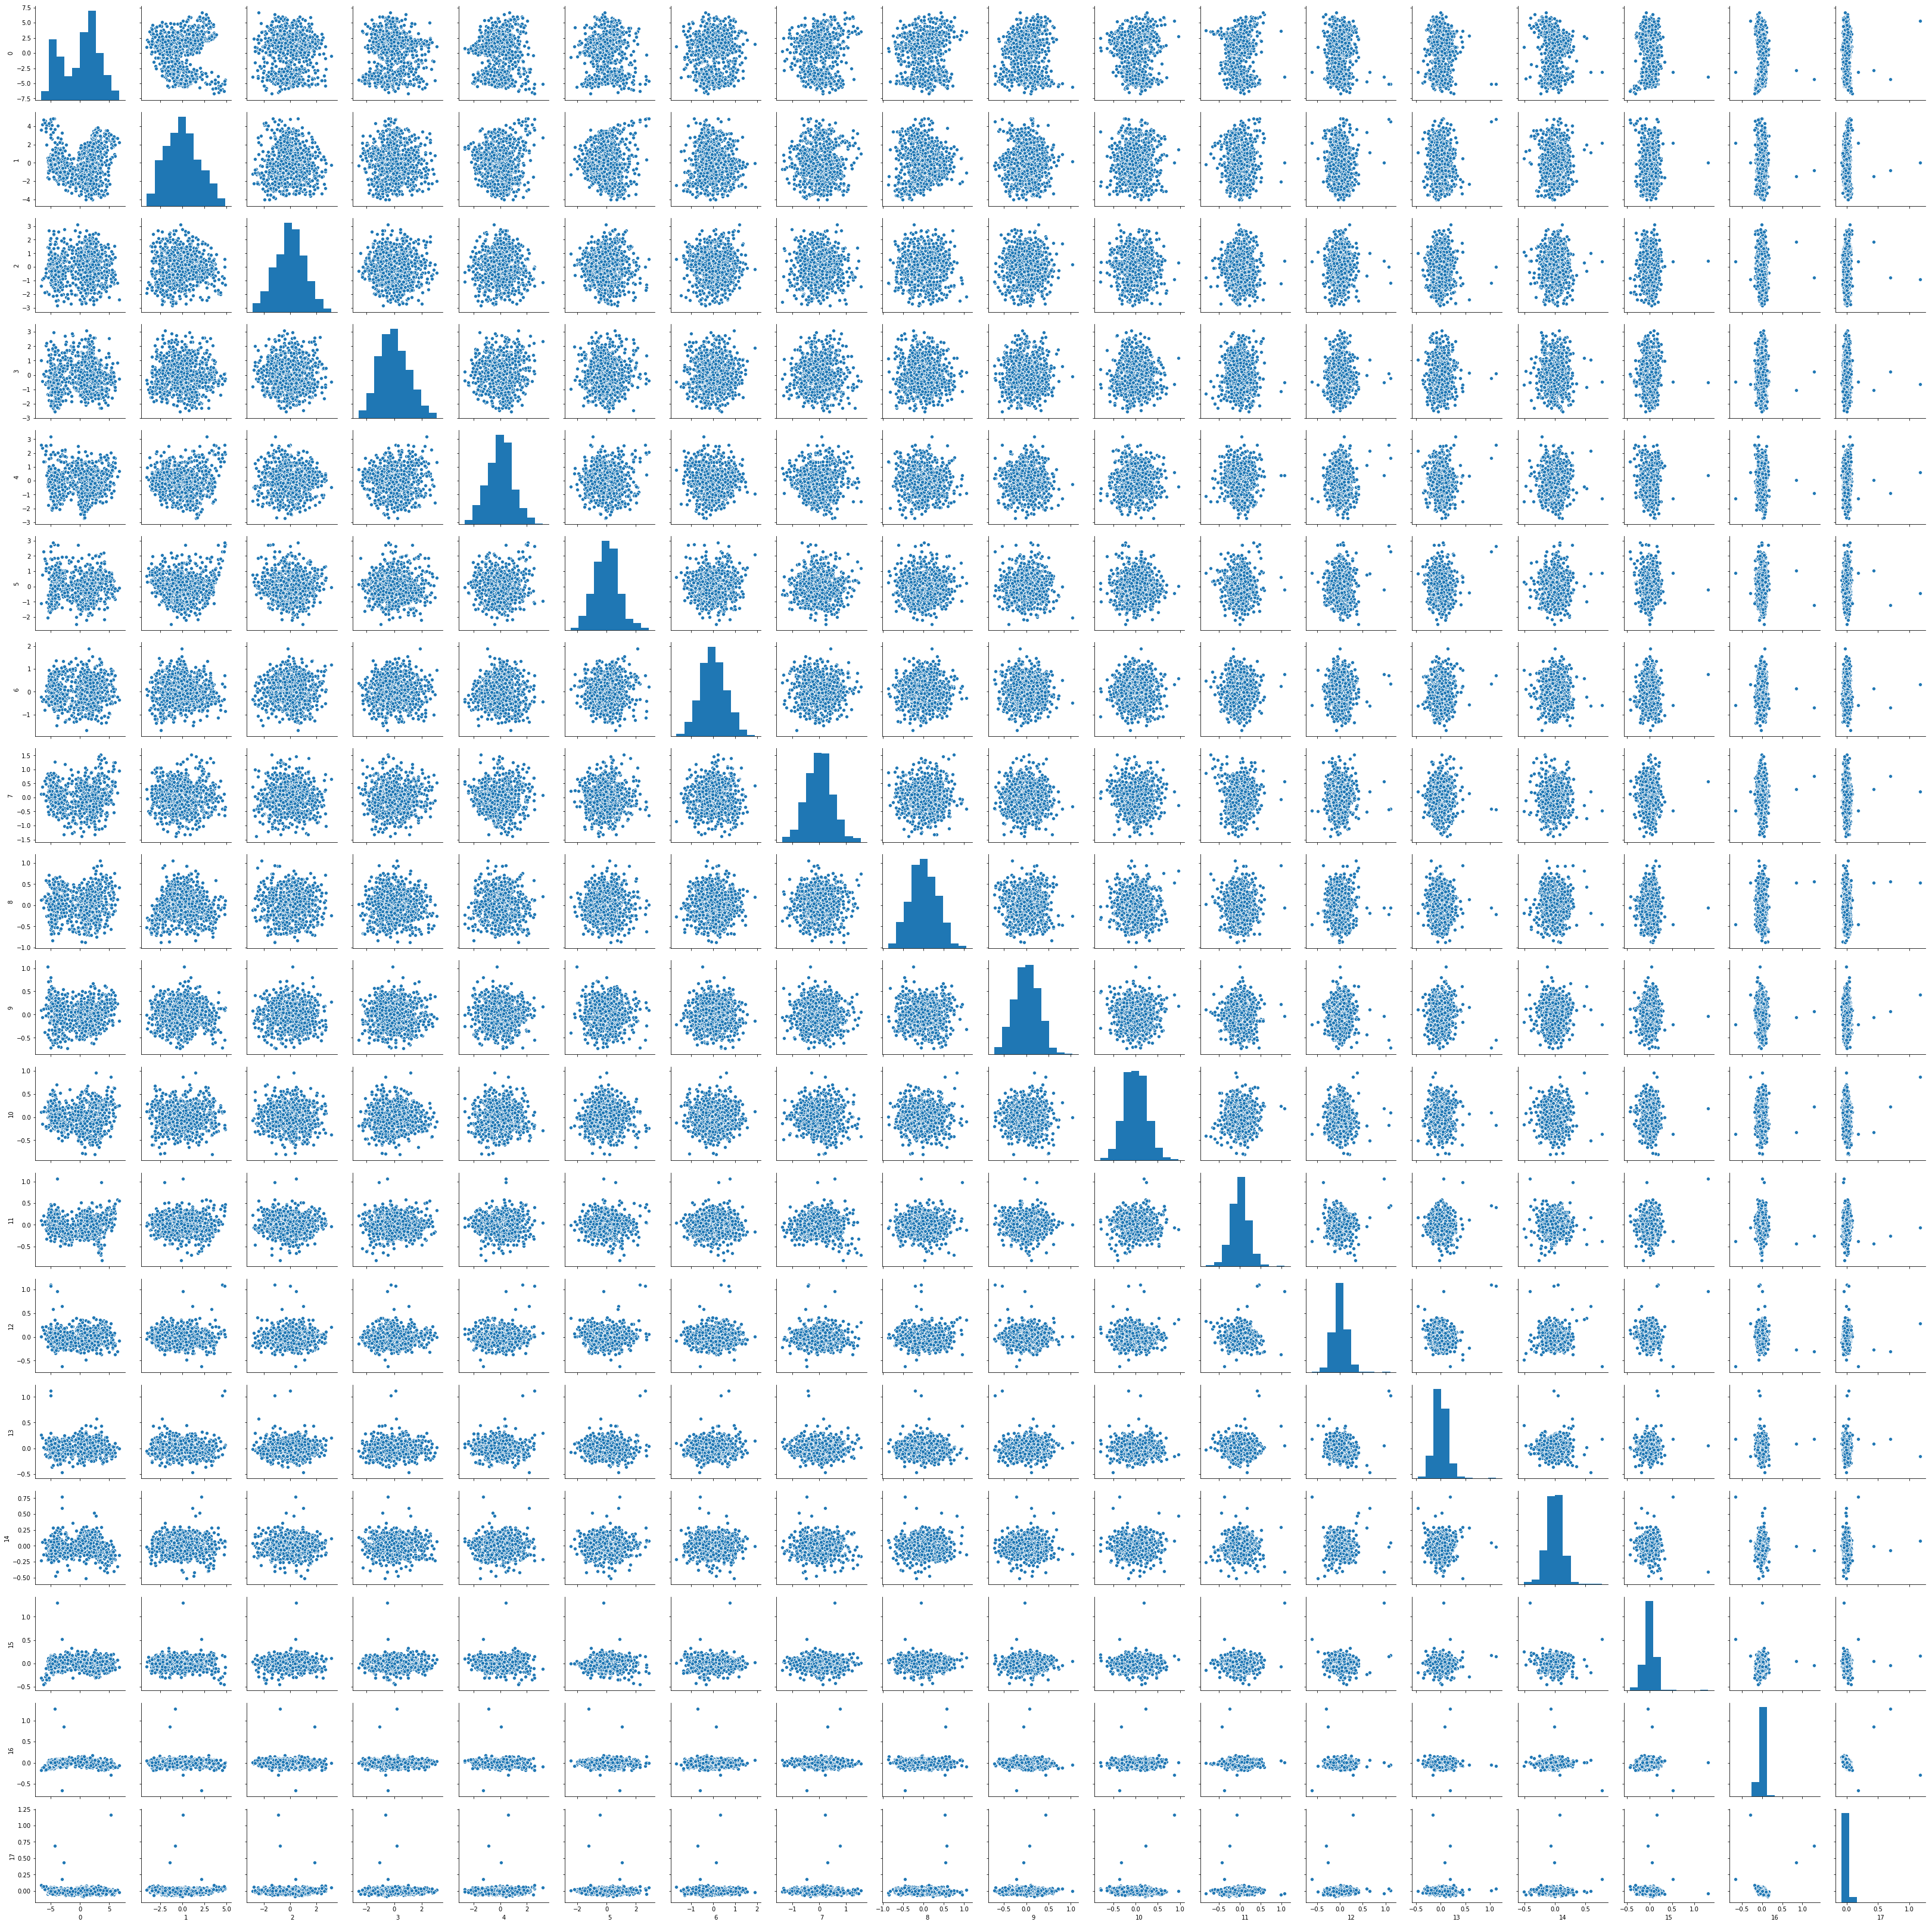

In [26]:
sns.pairplot(dff16)

The scatter plot also clearly yields that the there is no correlation between PCA components

In [27]:
pca.components_

array([[-0.27131308, -0.28481458, -0.30134378, -0.27353062, -0.09857637,
        -0.19042558, -0.31080702,  0.31080946, -0.3075254 , -0.27621082,
        -0.30362639, -0.30963817, -0.26011961,  0.03943821, -0.03381507,
        -0.0530113 , -0.03658869, -0.08379154],
       [-0.09081474,  0.13607701, -0.04682564, -0.20877836, -0.26069708,
        -0.10740989,  0.07073514, -0.02692056,  0.08485657,  0.12704801,
         0.06894377,  0.06674198,  0.2128317 ,  0.50398322, -0.01942529,
        -0.07908721, -0.49958608, -0.50414511],
       [ 0.01754508,  0.2131627 , -0.08019091, -0.03038385,  0.13314216,
         0.10914382, -0.1104143 ,  0.09556476, -0.10957254,  0.21137032,
        -0.13602908, -0.10870934,  0.23015641, -0.05888278,  0.51068736,
        -0.69792472,  0.05919212,  0.0329907 ],
       [-0.1376787 ,  0.00703   , -0.09182124,  0.24622716,  0.58640629,
        -0.31987107,  0.01836115, -0.07242535, -0.01143124, -0.07827966,
         0.07436644,  0.03072958,  0.0521445 ,  0.132

# Training on actual dataset

In [28]:
dff_.iloc[:,-1]=dff_.replace({'van':1,'bus':2,'car':3}).iloc[:,-1]

E:\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
%%time
X_train,X_test,y_train,y_test=train_test_split(dff_scaled,dff_.iloc[:,-1],test_size=0.25,random_state=1)
model1=svm.SVC()
model1.fit(X_train,y_train)
print(model1.score(X_test,y_test))
display(pd.crosstab(y_test,model1.predict(X_test)))

0.9710144927536232


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


col_0   1   2    3
class             
1      35   0    2
2       0  59    1
3       3   0  107

Wall time: 121 ms


In [43]:
%%time
dropp_data=dff_scaled.drop(dropp,axis=1)
X_train,X_test,y_train,y_test=train_test_split(dropp_data,dff_.iloc[:,-1],test_size=0.25,random_state=1)
model1=svm.SVC()
model1.fit(X_train,y_train)
print(model1.score(X_test,y_test))
display(pd.crosstab(y_test,model1.predict(X_test)))

0.9516908212560387


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


col_0   1   2    3
class             
1      30   3    4
2       0  59    1
3       2   0  108

Wall time: 116 ms


By dropping the columns accuracy is reduced to 95 % from 97% which is not a big deal this model with 8 features dropped will generalize well than the previous

# Training on Princpal components

In [44]:
pca7=PCA(n_components=7)
pca7.fit(dff_scaled)
dff7=pca7.transform(dff_scaled)

In [45]:
%%time
X_train,X_test,y_train,y_test=train_test_split(dff7,dff_.iloc[:,-1],test_size=0.25,random_state=1)
model1=svm.SVC()
model1.fit(X_train,y_train)
print(model1.score(X_test,y_test))
display(pd.crosstab(y_test,model1.predict(X_test)))

0.927536231884058


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


col_0   1   2    3
class             
1      33   2    2
2       0  59    1
3       9   1  100

Wall time: 108 ms


In [46]:
%%time
X_train,X_test,y_train,y_test=train_test_split(dff16,dff_.iloc[:,-1],test_size=0.25,random_state=1)
model1=svm.SVC()
model1.fit(X_train,y_train)
print(model1.score(X_test,y_test))
display(pd.crosstab(y_test,model1.predict(X_test)))

0.9710144927536232


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


col_0   1   2    3
class             
1      35   0    2
2       0  59    1
3       3   0  107

Wall time: 119 ms


It shows that the training in whole dataset and PCA with all components have high accuracy of 97% but PCA training and prediction is faster but not much significant in this dataset. while the PCA model with 7 components has lesser accuracy of 92.7 % compared to the full dataset, training and prediction speed is higher.

Note: the cell execution time showed is sum of training and crosstab prediction time. the training time alone is very less, on the range of 55 ms

# Lets do PCA on dataset before scaling

Text(0, 0.5, 'variance explained')

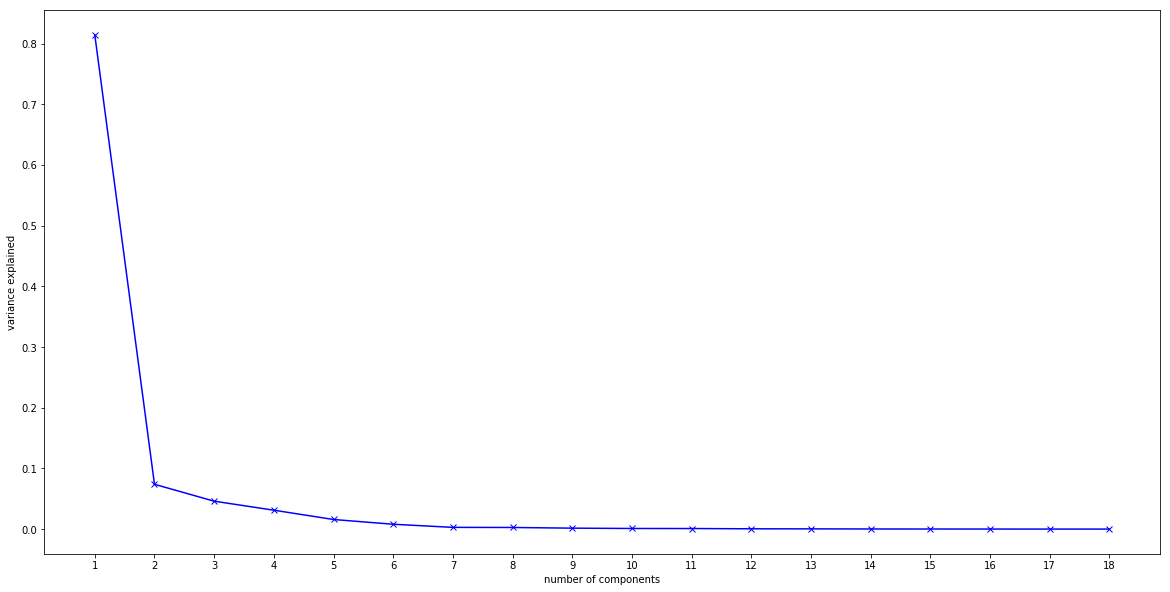

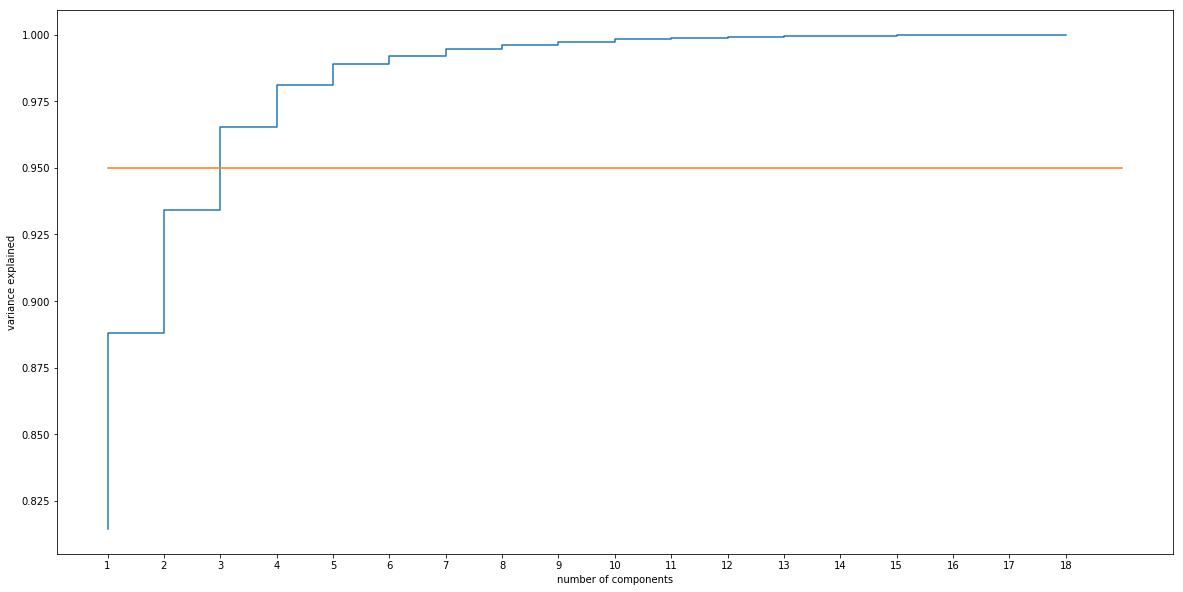

In [47]:
pca=PCA(n_components=18)
pca.fit(dff_.iloc[:,:-1])
pca.explained_variance_
dff16_=pca.transform(dff_.iloc[:,:-1])
plt.figure(figsize=(20,10))
plt.plot(list(range(1,19)),pca.explained_variance_ratio_,'bx-')
plt.xlabel('number of components')
plt.xticks(ticks=list(range(1,19)))
plt.ylabel('variance explained')
plt.figure(figsize=(20,10))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_))
plt.plot(list([1,19]),list([0.95,0.95]))
plt.xlabel('number of components')
plt.xticks(ticks=list(range(1,19)))
plt.ylabel('variance explained')

The plot shows the 95% of variance is captured by 5 components, but there is no significant elbow in the plot
lets try training with 5 components

In [49]:
pca5=PCA(n_components=5)
pca5.fit(dff_.iloc[:,:-1])
dff5=pd.DataFrame(pca5.transform(dff_.iloc[:,:-1]))
dff5_=dff5.apply(zscore)
X_train,X_test,y_train,y_test=train_test_split(dff5_,dff_.iloc[:,-1],test_size=0.25,random_state=1)
model1=svm.SVC()
model1.fit(X_train,y_train)
print(model1.score(X_test,y_test))
display(pd.crosstab(y_test,model1.predict(X_test)))

0.714975845410628


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


col_0   1   2   3
class            
1      22   5  10
2      14  28  18
3       8   4  98

Accuracy is so low compared to previous trials even though the variance is captured

# Lets train on full PCA components

In [72]:
pca16_=PCA(n_components=18)
pca16_.fit(dff_.iloc[:,:-1])
dff16_=pd.DataFrame(pca16_.transform(dff_.iloc[:,:-1]))
dff16__=dff16_.apply(zscore)
X_train,X_test,y_train,y_test=train_test_split(dff16__,dff_.iloc[:,-1],test_size=0.25,random_state=1)
model1=svm.SVC()
model1.fit(X_train,y_train)
print(model1.score(X_test,y_test))
display(pd.crosstab(y_test,model1.predict(X_test)))

0.9903381642512077


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


col_0   1   2    3
class             
1      36   0    1
2       0  60    0
3       0   1  109

Wow!! the accuracy is high 

In [51]:
print('trainig accuracy',model1.score(X_train,y_train))

trainig accuracy 0.9951534733441034


The training accuaracy is not 1.0 and the test and training accuracy are almost close(low variance), so the probability of model being overfitted is low

In [52]:
model1

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Grid Search

# Lets perfom grid search in model with high accuracy, low and medium accuracy

Low accuracy model

In [53]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
pca5=PCA(n_components=5)
pca5.fit(dff_.iloc[:,:-1])
dff5=pd.DataFrame(pca5.transform(dff_.iloc[:,:-1]))
dff5_=dff5.apply(zscore)
X_train,X_test,y_train,y_test=train_test_split(dff5_,dff_.iloc[:,-1],test_size=0.25,random_state=1)

param_grid = {'C': [0.01, 0.05, 0.5, 1,2],
              'kernel': ['linear','rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,cv=5) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.584, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ................ C=0.01, kernel=linear, score=0.56, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.6016260162601627, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.6504065040650406, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.5934959349593496, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ..... C=0.01, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.616, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.664, total=   0.0s

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.6260162601626016, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.6504065040650406, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.6097560975609756, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.512, total=   0.0s

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.528, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5121951219512195, total=   0.0s

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.704, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.672, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.6585365853658537, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.6422764227642277, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.6504065040650406, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ................... C=0.5, kernel=rbf, score=0.712, total=   0.0s
[CV] 

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's


[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.7235772357723578, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.7398373983739838, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=1, kernel=linear ..............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................... C=1, kernel=linear, score=0.72, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.664, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.6666666666666666, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.6504065040650406, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.6585365853658537, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ...................... C=1, kernel=rbf, score=0.72, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.736, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ........ C=1, kernel=rbf, score=0.7398373983739838, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.6991869918699187, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] .................. C=2, kernel=linear, score=0.712, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] .................. C=2, kernel=linear, score=0.664, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] ..... C=2, kernel=linear, score=0.6747967479674797, total=   0.0s

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=2, kernel=linear ..............................................
[CV] ..... C=2, kernel=linear, score=0.6585365853658537, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] ..... C=2, kernel=linear, score=0.6585365853658537, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ..................... C=2, kernel=rbf, score=0.752, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ..................... C=2, kernel=rbf, score=0.744, total=   0.0s

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's


[CV] C=2, kernel=rbf .................................................
[CV] ........ C=2, kernel=rbf, score=0.7560975609756098, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ........ C=2, kernel=rbf, score=0.7560975609756098, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ........ C=2, kernel=rbf, score=0.7154471544715447, total=   0.0s


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.5s finished
E:\python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1, 2], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [54]:
display('best parameters',grid.best_params_)
display('Mean test results',grid.cv_results_['mean_test_score'])
print('Accuracy',grid.score(X_test,y_test))
pd.crosstab(y_test,grid.predict(X_test))

'best parameters'

{'C': 2, 'kernel': 'rbf'}

'Mean test results'

array([0.59773829, 0.51211632, 0.63327948, 0.51534733, 0.66558966,
       0.71890145, 0.6720517 , 0.72213247, 0.67366721, 0.7447496 ])

Accuracy 0.7294685990338164


col_0   1   2   3
class            
1      24   7   6
2      12  30  18
3       8   5  97

The C value is made 2 from the default 1. accuracy is increased slightly,then for the next trail with high accuracy model do grid search with more number of c values

lets try on High accuracy model

In [75]:
pca16_=PCA(n_components=18)
pca16_.fit(dff_.iloc[:,:-1])
dff16_=pd.DataFrame(pca16_.transform(dff_.iloc[:,:-1]))
dff16__=dff16_.apply(zscore)
X_train,X_test,y_train,y_test=train_test_split(dff16__,dff_.iloc[:,-1],test_size=0.25,random_state=1)

param_grid = {'C': [0.01, 0.05, 0.5, 1,2,3,4,100],
              'kernel': ['linear','rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,cv=5) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.952, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ................ C=0.01, kernel=linear, score=0.92, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.9512195121951219, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=0.01, kernel=linear, score=0.9186991869918699, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.9349593495934959, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5121951219512195, total=   0.0s

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.936, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.912, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ... C=0.05, kernel=linear, score=0.959349593495935, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ... C=0.05, kernel=linear, score=0.943089430894309, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ... C=0.05, kernel=linear, score=0.943089430894309, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.512, total=   0.0s
[CV] 

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=0.05, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5121951219512195, total=   0.0s

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ................. C=0.5, kernel=linear, score=0.96, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.928, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] .... C=0.5, kernel=linear, score=0.967479674796748, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.9349593495934959, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] .... C=0.5, kernel=linear, score=0.959349593495935, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ................... C=0.5, kernel=rbf, score=0.976, total=   0.0s
[CV] 

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ....... C=0.5, kernel=rbf, score=0.983739837398374, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ....... C=0.5, kernel=rbf, score=0.959349593495935, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ....... C=0.5, kernel=rbf, score=0.967479674796748, total=   0.0s
[CV] C=1, kernel=linear ..............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=1, kernel=linear, score=0.952, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.912, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ...... C=1, kernel=linear, score=0.975609756097561, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ...... C=1, kernel=linear, score=0.943089430894309, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ...... C=1, kernel=linear, score=0.959349593495935, total=   0.0s
[CV] C=1, kernel=rbf .................................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ..................... C=1, kernel=rbf, score=0.984, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ......... C=1, kernel=rbf, score=0.991869918699187, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ......... C=1, kernel=rbf, score=0.967479674796748, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ......... C=1, kernel=rbf, score=0.983739837398374, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] ................... C=2, kernel=linear, score=0.96, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] .................. C=2, kernel=linear, score=0.904, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] .

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=2, kernel=linear ..............................................
[CV] ...... C=2, kernel=linear, score=0.943089430894309, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] ...... C=2, kernel=linear, score=0.959349593495935, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ..................... C=2, kernel=rbf, score=0.992, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ..................... C=2, kernel=rbf, score=0.984, total=   0.0s
[CV] C=2, kernel=rbf .................................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ......... C=2, kernel=rbf, score=0.983739837398374, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ......... C=2, kernel=rbf, score=0.967479674796748, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ......... C=2, kernel=rbf, score=0.975609756097561, total=   0.0s
[CV] C=3, kernel=linear ..............................................
[CV] .................. C=3, kernel=linear, score=0.968, total=   0.0s
[CV] C=3, kernel=linear ..............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=3, kernel=linear, score=0.904, total=   0.0s
[CV] C=3, kernel=linear ..............................................
[CV] ...... C=3, kernel=linear, score=0.967479674796748, total=   0.0s
[CV] C=3, kernel=linear ..............................................
[CV] ...... C=3, kernel=linear, score=0.943089430894309, total=   0.0s
[CV] C=3, kernel=linear ..............................................
[CV] ...... C=3, kernel=linear, score=0.967479674796748, total=   0.0s
[CV] C=3, kernel=rbf .................................................
[CV] ..................... C=3, kernel=rbf, score=0.992, total=   0.0s
[CV] C=3, kernel=rbf .................................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ..................... C=3, kernel=rbf, score=0.984, total=   0.0s
[CV] C=3, kernel=rbf .................................................
[CV] ......... C=3, kernel=rbf, score=0.983739837398374, total=   0.0s
[CV] C=3, kernel=rbf .................................................
[CV] ......... C=3, kernel=rbf, score=0.975609756097561, total=   0.0s
[CV] C=3, kernel=rbf .................................................
[CV] ......... C=3, kernel=rbf, score=0.975609756097561, total=   0.0s
[CV] C=4, kernel=linear ..............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=4, kernel=linear, score=0.968, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV] .................. C=4, kernel=linear, score=0.904, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV] ...... C=4, kernel=linear, score=0.975609756097561, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV] ..... C=4, kernel=linear, score=0.9349593495934959, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV] ...... C=4, kernel=linear, score=0.967479674796748, total=   0.0s
[CV] C=4, kernel=rbf .................................................
[CV] ..................... C=4, kernel=rbf, score=0.992, total=   0.0s
[CV] C=4, kernel=rbf .................................................
[CV] ..................... C=4, kernel=rbf, score=0.984, total=   0.0s
[CV] C=4, kernel=rbf .................................................
[CV] .

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ......... C=4, kernel=rbf, score=0.975609756097561, total=   0.0s
[CV] C=4, kernel=rbf .................................................
[CV] ......... C=4, kernel=rbf, score=0.975609756097561, total=   0.0s
[CV] C=100, kernel=linear ............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=100, kernel=linear, score=0.936, total=   0.0s
[CV] C=100, kernel=linear ............................................
[CV] ................ C=100, kernel=linear, score=0.896, total=   0.1s
[CV] C=100, kernel=linear ............................................
[CV] .... C=100, kernel=linear, score=0.959349593495935, total=   0.1s
[CV] C=100, kernel=linear ............................................
[CV] ... C=100, kernel=linear, score=0.9105691056910569, total=   0.4s
[CV] C=100, kernel=linear ............................................
[CV] .... C=100, kernel=linear, score=0.967479674796748, total=   0.0s
[CV] C=100, kernel=rbf ...............................................
[CV] ................... C=100, kernel=rbf, score=0.992, total=   0.0s
[CV] C=100, kernel=rbf ...............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................... C=100, kernel=rbf, score=0.984, total=   0.0s
[CV] C=100, kernel=rbf ...............................................
[CV] ....... C=100, kernel=rbf, score=0.983739837398374, total=   0.0s
[CV] C=100, kernel=rbf ...............................................
[CV] ....... C=100, kernel=rbf, score=0.975609756097561, total=   0.0s
[CV] C=100, kernel=rbf ...............................................
[CV] ....... C=100, kernel=rbf, score=0.967479674796748, total=   0.0s


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.5s finished
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1, 2, 3, 4, 100], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [76]:
display('best parameters',grid.best_params_)
display('Mean test results',grid.cv_results_['mean_test_score'])
print('Accuracy',grid.score(X_test,y_test))
pd.crosstab(y_test,grid.predict(X_test))

'best parameters'

{'C': 3, 'kernel': 'rbf'}

'Mean test results'

array([0.93537964, 0.51211632, 0.93861066, 0.51211632, 0.94991922,
       0.97092084, 0.94830372, 0.98061389, 0.94668821, 0.98061389,
       0.94991922, 0.9822294 , 0.94991922, 0.9822294 , 0.93376414,
       0.98061389])

Accuracy 0.9806763285024155


col_0   1   2    3
class             
1      36   0    1
2       0  60    0
3       1   2  107

The accuracy is dropped

In [77]:
X_train,X_test,y_train,y_test=train_test_split(dff7,dff_.iloc[:,-1],test_size=0.25,random_state=1)
param_grid = {'C': [0.01, 0.05, 0.5, 1,2,4,5,100],
              'kernel': ['linear','rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,cv=5) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.824, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ................. C=0.01, kernel=linear, score=0.8, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8455284552845529, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8211382113821138, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8211382113821138, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ..... C=0.01, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.832, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.816, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.8780487804878049, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.8211382113821138, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's


[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.6260162601626016, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ................. C=0.5, kernel=linear, score=0.84, total=   0.0s

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=0.5, kernel=linear ............................................
[CV] ................. C=0.5, kernel=linear, score=0.84, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.9024390243902439, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8211382113821138, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8617886178861789, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ................... C=0.5, kernel=rbf, score=0.888, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ................... C=0.5, kernel=rbf, score=0.928, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ....... C=0.5, kernel=rbf, score=0.943089430894309, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.9512195121951219, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.9024390243902439, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ................... C=1, kernel=linear, score=0.84, total=   0.0s

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.832, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8943089430894309, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8211382113821138, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8617886178861789, total=   0.0s
[CV] C=1, kernel=rbf .................................................


E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ..................... C=1, kernel=rbf, score=0.928, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.936, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ......... C=1, kernel=rbf, score=0.959349593495935, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ......... C=1, kernel=rbf, score=0.943089430894309, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.9186991869918699, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] ................... C=2, kernel=linear, score=0.84, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] .................. C=2, kernel=linear, score=0.832, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV] .

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ..................... C=2, kernel=rbf, score=0.944, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ......... C=2, kernel=rbf, score=0.943089430894309, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ......... C=2, kernel=rbf, score=0.943089430894309, total=   0.0s
[CV] C=2, kernel=rbf .................................................
[CV] ........ C=2, kernel=rbf, score=0.9349593495934959, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV] ................... C=4, kernel=linear, score=0.84, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV] .................. C=4, kernel=linear, score=0.832, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV] ..... C=4, kernel=linear, score=0.8943089430894309, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV] .

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] .................. C=5, kernel=linear, score=0.832, total=   0.0s
[CV] C=5, kernel=linear ..............................................
[CV] .................. C=5, kernel=linear, score=0.832, total=   0.0s
[CV] C=5, kernel=linear ..............................................
[CV] ..... C=5, kernel=linear, score=0.8943089430894309, total=   0.0s
[CV] C=5, kernel=linear ..............................................
[CV] ..... C=5, kernel=linear, score=0.8211382113821138, total=   0.0s
[CV] C=5, kernel=linear ..............................................
[CV] ..... C=5, kernel=linear, score=0.8536585365853658, total=   0.0s
[CV] C=5, kernel=rbf .................................................
[CV] ..................... C=5, kernel=rbf, score=0.936, total=   0.0s
[CV] C=5, kernel=rbf .................................................
[CV] ..................... C=5, kernel=rbf, score=0.944, total=   0.0s
[CV] C=5, kernel=rbf .................................................
[CV] .

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[CV] ........ C=5, kernel=rbf, score=0.9349593495934959, total=   0.0s
[CV] C=5, kernel=rbf .................................................
[CV] ........ C=5, kernel=rbf, score=0.9512195121951219, total=   0.0s
[CV] C=100, kernel=linear ............................................
[CV] ................ C=100, kernel=linear, score=0.832, total=   0.6s
[CV] C=100, kernel=linear ............................................
[CV] ................ C=100, kernel=linear, score=0.832, total=   0.7s
[CV] C=100, kernel=linear ............................................
[CV] ... C=100, kernel=linear, score=0.8861788617886179, total=   0.6s
[CV] C=100, kernel=linear ............................................
[CV] ... C=100, kernel=linear, score=0.8130081300813008, total=   0.7s
[CV] C=100, kernel=linear ............................................
[CV] ... C=100, kernel=linear, score=0.8455284552845529, total=   0.8s
[CV] C=100, kernel=rbf ...............................................
[CV] .

E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.1s finished
E:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1, 2, 4, 5, 100], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [260]:
display('best parameters',grid.best_params_)
display('Mean test results',grid.cv_results_['mean_test_score'])
print('Accuracy',grid.score(X_test,y_test))
pd.crosstab(y_test,grid.predict(X_test))

'best parameters'

{'C': 4, 'kernel': 'rbf'}

'Mean test results'

array([0.82229402, 0.51211632, 0.84006462, 0.61066236, 0.85298869,
       0.92245557, 0.84975767, 0.93699515, 0.84814216, 0.93861066,
       0.84814216, 0.94184168, 0.84652666, 0.94184168, 0.84168013,
       0.93537964])

Accuracy 0.927536231884058


col_0   1   2    3
class             
1      34   1    2
2       0  56    4
3       6   2  102

No improvement in accuracy. just the wrong predictions shifted
So I choose c =1 Kernerl = rbf as best parameters based on above results

# Lets train on Few different model

In [65]:
pca16_=PCA(n_components=18)
pca16_.fit(dff_.iloc[:,:-1])
dff16_=pd.DataFrame(pca16_.transform(dff_.iloc[:,:-1]))
dff16__=dff16_.apply(zscore)
PX_train,PX_test,Py_train,Py_test=train_test_split(dff16__,dff_.iloc[:,-1],test_size=0.25,random_state=1)
X_train,X_test,y_train,y_test=train_test_split(dff_scaled,dff_.iloc[:,-1],test_size=0.25,random_state=1)

# Naive bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
Naive_model=GaussianNB()
Naive_model.fit(X_train,y_train)
print('Accuray without PCA',Naive_model.score(X_test,y_test))
Naive_model.fit(PX_train,Py_train)
print('Accuray with PCA',Naive_model.score(PX_test,Py_test))

Accuray without PCA 0.6473429951690821
Accuray with PCA 0.9371980676328503


Show dramatic increase in Accuracy as naive bayes is based on the assumption that there is no correlation between attributes

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
Logistic_model=LogisticRegression(solver='lbfgs',multi_class='auto')
Logistic_model.fit(X_train,y_train)
print('Accuray without PCA',Logistic_model.score(X_test,y_test))
Logistic_model.fit(PX_train,Py_train)
print('Accuray with PCA',Logistic_model.score(PX_test,Py_test))

Accuray without PCA 0.9758454106280193
Accuray with PCA 0.961352657004831


# Decision tree Classification

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Decision_model=DecisionTreeClassifier(criterion='gini',random_state=1)
Decision_model.fit(X_train,y_train)
k1=Decision_model.predict(X_test)
print("Accuracy without PCA:",accuracy_score(y_test,k1))
Decision_model.fit(PX_train,Py_train)
k1=Decision_model.predict(PX_test)
print('Accuracy with PCA ',accuracy_score(Py_test,k1))

Accuracy without PCA: 0.893719806763285
Accuracy with PCA  0.8405797101449275


# Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
Random_model=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=1)
Random_model.fit(X_train,y_train)
k1=Random_model.predict(X_test)
print("Accuracy without PCA:",accuracy_score(y_test,k1))
Random_model.fit(PX_train,Py_train)
k1=Random_model.predict(PX_test)
print('Accuracy with PCA ',accuracy_score(Py_test,k1))

Accuracy without PCA: 0.9758454106280193
Accuracy with PCA  0.961352657004831


# Light GBM

In [70]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
params = {
      'task': 'train'
    , 'boosting_type': 'gbdt'
    , 'objective':'multiclass'
    , 'num_class': 4
    , 'metric':'multi_logloss'
    , 'min_data': 1
    ,'learning_rate':0.1
    , 'verbose': -1    
}

gbm1= lgb.train(params, lgb_train, num_boost_round=100)
prediction=gbm1.predict(X_test)
predict=[]
for i in prediction:
    predict.append(np.argmax(i))
print('Accuracy Without PCA',accuracy_score(predict,y_test))

lgb_train = lgb.Dataset(PX_train, Py_train)
gbm1= lgb.train(params, lgb_train, num_boost_round=100)
prediction=gbm1.predict(PX_test)
predict=[]
for i in prediction:
    predict.append(np.argmax(i))
print('Accuracy With PCA',accuracy_score(predict,Py_test))

Accuracy Without PCA 0.9227053140096618
Accuracy With PCA 0.8985507246376812


# XGBOOST

In [71]:
import xgboost as xgb
xg_train=xgb.DMatrix(X_train,label=y_train)
xg_test=xgb.DMatrix(X_test,label=y_test)
params1={'eta':0.3,'objective':'multi:softprob','num_class':4}
xgb_model=xgb.train(params1,xg_train)
predictions=xgb_model.predict(xg_test)
predicts=[]
for i in predictions:
    predicts.append(np.argmax(i))
print('Accuracy without PCA',accuracy_score(predicts,y_test))
xg_train=xgb.DMatrix(PX_train,label=Py_train)
xg_test=xgb.DMatrix(PX_test,label=Py_test)
params1={'eta':0.3,'objective':'multi:softprob','num_class':4}
xgb_model=xgb.train(params1,xg_train)
predictions=xgb_model.predict(xg_test)
predicts=[]
for i in predictions:
    predicts.append(np.argmax(i))
print('Accuracy with PCA',accuracy_score(predicts,y_test))

E:\python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Accuracy without PCA 0.9565217391304348
Accuracy with PCA 0.9033816425120773


# Summary 

1) Data set had missing values and outlier, Missing values are replaced with median values and square root is taken and dropped   the remaining outlies. Finally we had 826 clean rows of data

2) There was a strong correlation between attributes. based on the Correlation values almost 8 columns could be dropped or        combined with other columns to form new features. I decided to proceed with PCA for feature extraction and found that PCA      data provide high accuracy result, The column that could be eliminated are ['max.length_rectangularity', 'scaled_radius_of_gyration', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'hollows_ratio']

3) As it can be seen from the scatter plot and correlation matrix of PCA data, PCA provides feature with almost no correlation
   which captures the variance of the dataset in descending order

4) As it can be seen from the trials that we get a highest accuracy of 99% using SVM on PCA data with all the 18 components.      Here PCA was applied on original data and the zscore normalisation is done.

5) Prediction accuracy is around 97% if PCA is performed on scaled data

6) The prediction accuracy is around 92% with 7 number of PCA components which captures above 95% of variance in scaled data. this model may generalize well when compared to other models

7) The prediction accuracy drops dramatically with 5 number of PCA components even though it captures above 95% of variance in    the data in unscaled data. It shows that the dimensionality reduction with PCA has to be done only on the scaled data. But      on seeing back to point 1 in this summar,y accuracy is high when PCA is performed on unscaled data and all components are      used in training. It leads us to the understanding that if PCA is used for dimensionality reduciton use it on scaled data.      if PCA is used to remove the interdependency between attributes and you plan to use all the PCA components for training use    it on unscaled data

8) In this case the grid search also yields same,better and slightly high accuracy results at various trials. C=1 and              kernel=rbf seems to be better

9) Accuray of all other models are less than the SVM with and without PCA, Infact except SVM and Naive bayes the accuracy of      all other models drops with PCA even when using all the components. It shows strongly that the Naive bayes will perform        better if there is no dependency in the dataset